## Project info
The company seeks to automate (in real time) the loan qualifying procedure based on information given by customers while filling out an online application form. It is expected that the development of ML models that can help the company predict loan approval in accelerating decision-making process for determining whether an applicant is eligible for a loan or not.

### Objectives of Notebook 
👉 This notebook aims to:

* Data Clean and Data transformation
* Analyze customer data provided in data set (EDA)
* Nomalyze the date ML
* Build various ML models that can predict loan approval

> The machine learning models used in this project are:
* Pipeline
* Logistic Regression
* GridSearchCV
* Decision Tree
* Random Forest



### Python libraries

In [245]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [246]:
# import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats.mstats import normaltest
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


In [247]:
#load the dataset
df = pd.read_csv("train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [249]:
df.drop(['Loan_ID'], axis= 1, inplace=True)

`df.isnull().sum()`

`isnull().sum()` returns a DataFrame where each cell is either True or False depending on that cell's null status.

To count the number of nulls in each column i use an aggregate function to calculate the parcentages of null value per each column

In [250]:
#% of missing values per column
df.isnull().sum()/len(df)*100

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [251]:
#Count the number of duplicates in the dataset
df.duplicated().sum()

0

 There is some ouliers in Loan amount and coapplicant income column,

In [252]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [253]:
df['Loan_range'] = df['LoanAmount'].apply(lambda x : "Low_amount" if x < 200 
                                                     else ("Medium_amount" if 200 <= x < 500
                                                           else "High_amount"))

<Axes: xlabel='Loan_range'>

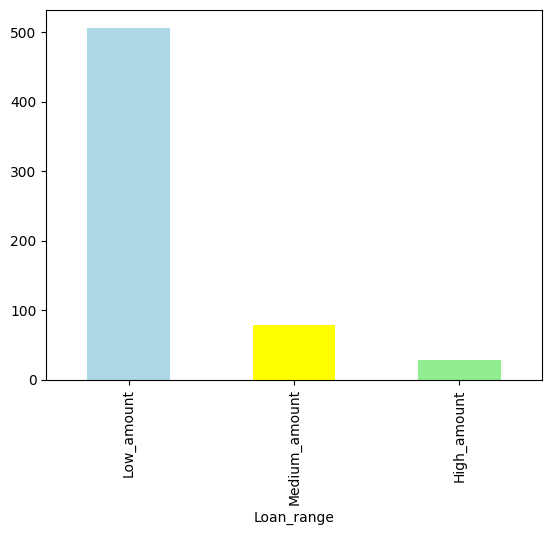

In [254]:
df['Loan_range'].value_counts().plot.bar(color=['lightblue', 'yellow', 'lightgreen'])

Seeing that we have some of null value in this dataset i would like to deal with it per single column

In [255]:
#will replace all the null vall with the majority value that appears in this column
df['Gender']=df['Gender'].replace(np.nan,'Male')

In [256]:
#All the nan value will be replace with 0
df['Credit_History']=df['Credit_History'].replace(np.nan,'0')


In [257]:
df['Gender'].value_counts(normalize=True)*100

Gender
Male      81.758958
Female    18.241042
Name: proportion, dtype: float64

In [258]:
df['Married'].value_counts(normalize=True)*100

Married
Yes    65.139116
No     34.860884
Name: proportion, dtype: float64

In [259]:
df['Self_Employed'].value_counts(normalize=True)*100

Self_Employed
No     85.910653
Yes    14.089347
Name: proportion, dtype: float64

In [260]:
df['Property_Area'].value_counts(normalize=True)*100

Property_Area
Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: proportion, dtype: float64

In [261]:
df['Loan_Status'].value_counts(normalize=True)*100

Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64

In [262]:
df['Dependents']=df['Dependents'].replace(np.nan,'0')
df['Dependents']=df['Dependents'].replace('3+' , '3')
df['Married']=df['Married'].replace(np.nan , 'Yes')
df['LoanAmount']=df['LoanAmount'].replace(np.nan , df['LoanAmount'].mean())


In [263]:
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

Now will removed all the remains null values

In [264]:
df.dropna(inplace= True)

In [265]:
features =['Gender', 'Married', 'Dependents', 'Education','Loan_range',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area']

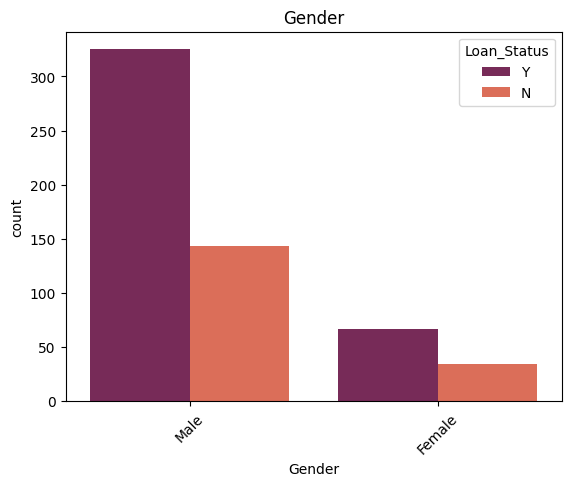

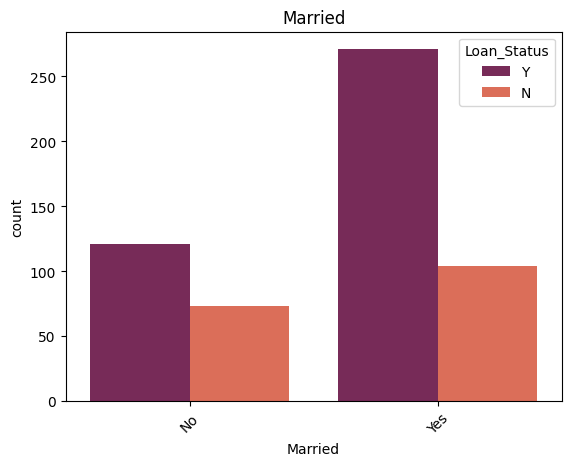

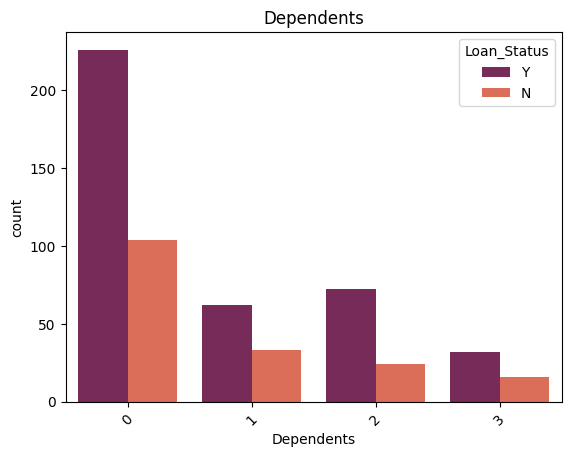

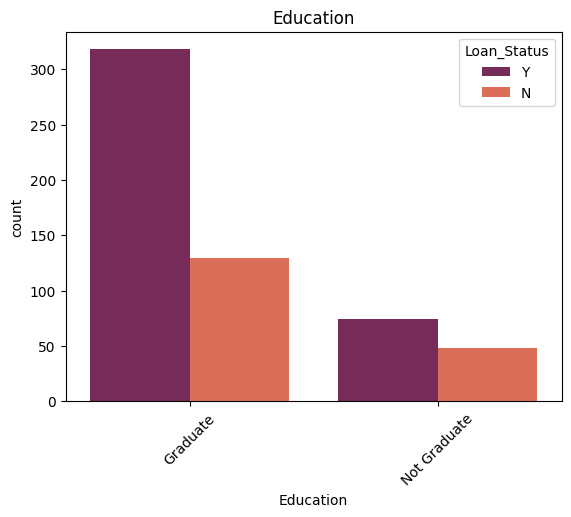

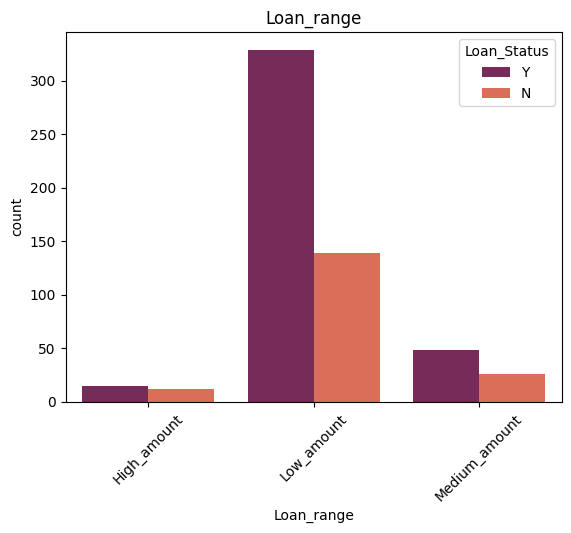

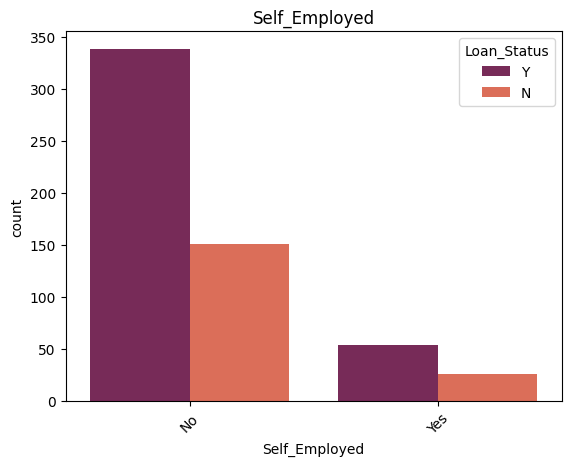

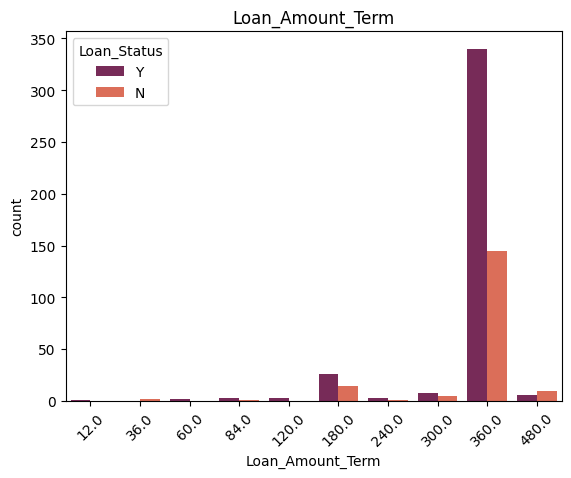

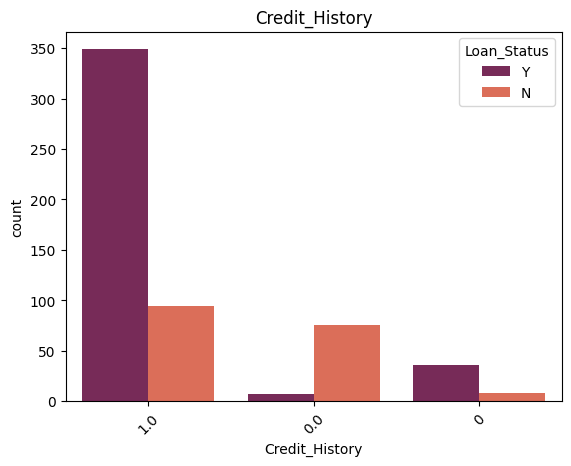

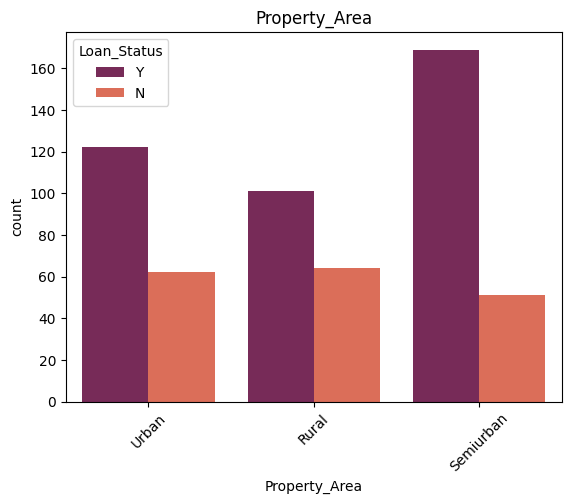

In [266]:
#Viz all the features columns
for c in features:
    sns.countplot(data=df, x = df[c], palette="rocket", hue=df['Loan_Status'] )
    plt.xticks(rotation=45)
    plt.title(f"{c}")
    plt.show()

Let check the relation between some column below, we'll use the `lmplot` method to fit s regression model, That's going to display a correlation between the following columns:

<Figure size 1000x2000 with 0 Axes>

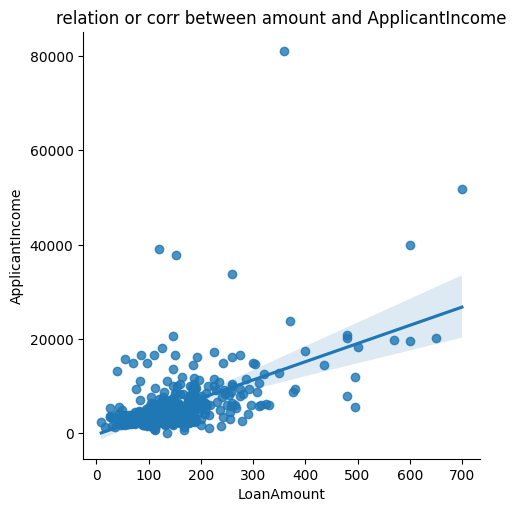

In [267]:
#lets check appican icome and   loan amount
plt.figure(figsize=(10, 20))
sns.lmplot(data=df, y='ApplicantIncome', x = 'LoanAmount')
plt.title('relation or corr between amount and ApplicantIncome')
plt.show()

<Figure size 1000x2000 with 0 Axes>

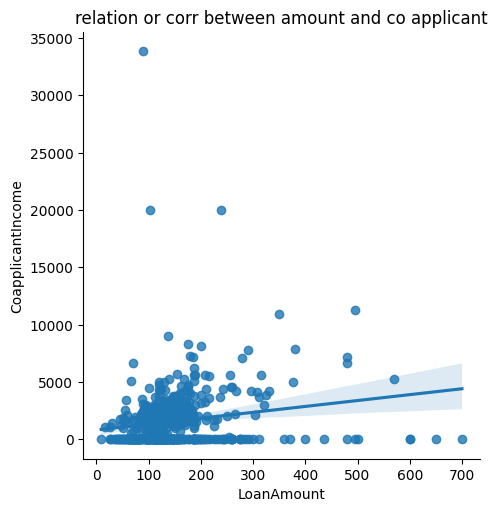

In [268]:
#lets check CoapplicantIncome icome and loan amount

plt.figure(figsize=(10, 20))
sns.lmplot(data=df, y='CoapplicantIncome', x = 'LoanAmount')
plt.title('relation or corr between amount and co applicant')
plt.show()

In [269]:
#select only the numeric columns in the DataFrame
df1 = df.select_dtypes(include=np.number)

**Heatmap** is defined as a graphical representation of data using colors to visualize the value of the matrix. In this, to represent more common values or higher activities brighter colors basically reddish colors are used and to represent less common or activity values

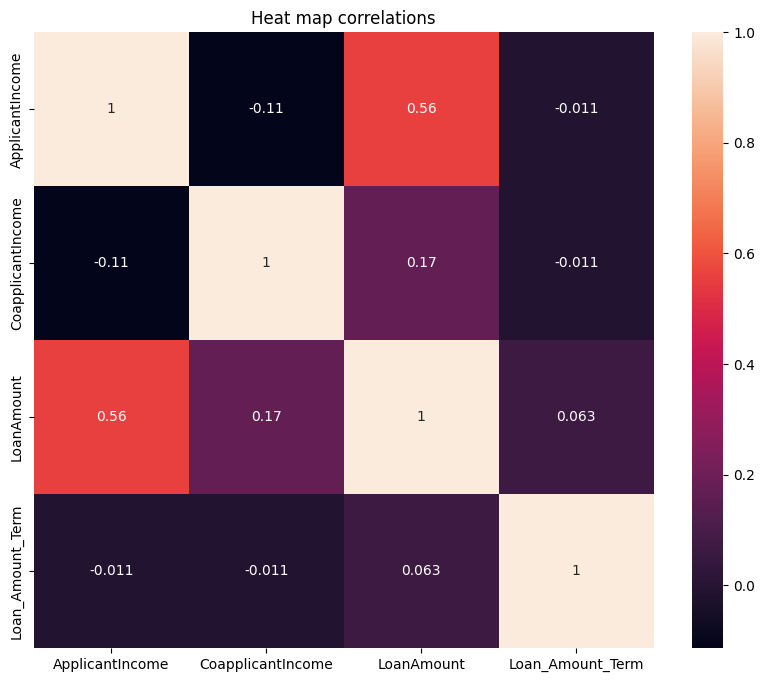

In [270]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(), annot=True)
plt.title("Heat map correlations")
plt.show()

In [271]:
corr_matrix = df1.corr()
corr_matrix['LoanAmount'].sort_values(ascending=False)

LoanAmount           1.000000
ApplicantIncome      0.557771
CoapplicantIncome    0.172477
Loan_Amount_Term     0.063308
Name: LoanAmount, dtype: float64

# Outliers



INSIGHT:

we have some outliers in Applicant income and CoapplicatIncome columns, we'll to removed it for perdiction in machine learning


We will use the `boxplot()` function on the columns mentioned below categorical variables, to display the mean, variance, and possible outliers after utizesd quantile function, with respect to the Loan amount.

### Remove the outliers in the following columns

In [272]:
outliers =['CoapplicantIncome','Loan_Amount_Term', 'ApplicantIncome', 'LoanAmount']

In [273]:
#remove the oulier, from 0.01 to 0.75 parcent
for c in outliers:
    Q1=df[c].quantile(0.01)
    Q3=df[c].quantile(0.75)
    df=df[df[c]<=Q3]
    df=df[df[c]>=Q1]

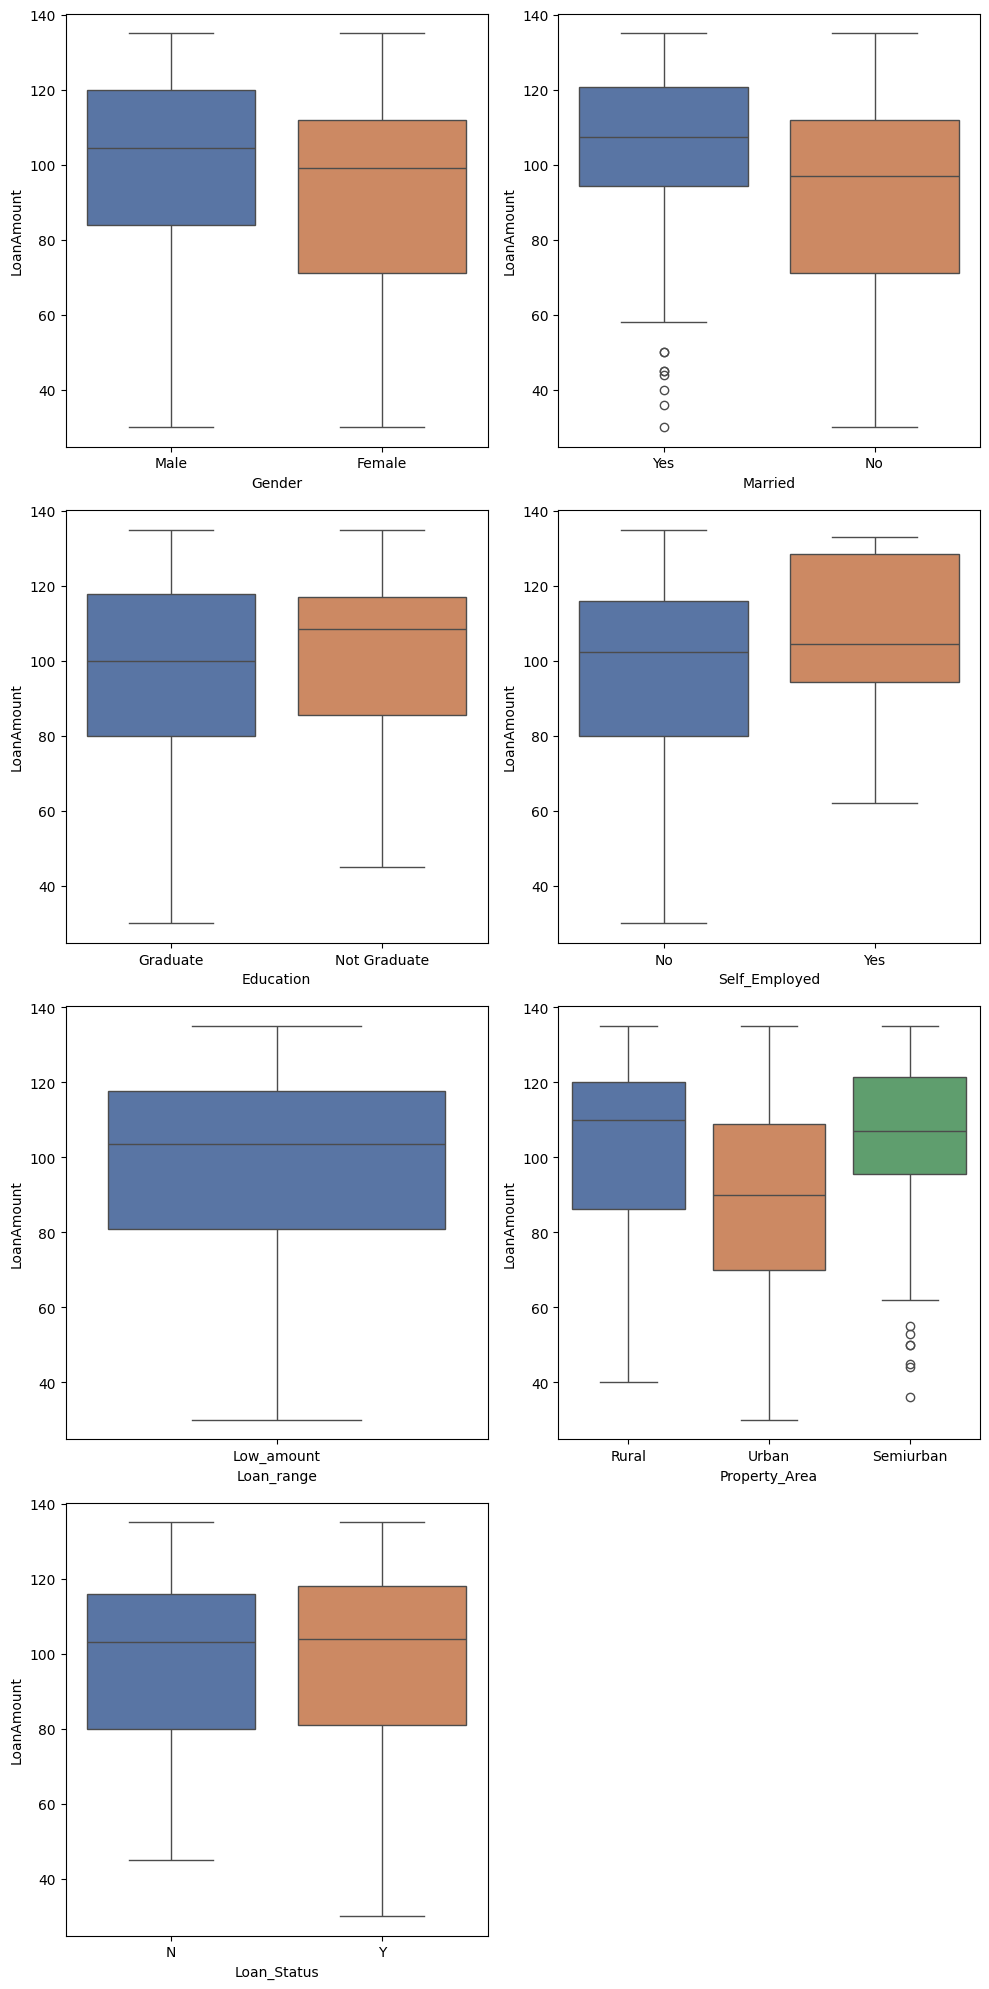

In [274]:
plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'Gender', y = 'LoanAmount', palette="deep", data = df)
plt.subplot(4,2,2)
sns.boxplot(x = 'Married', y = 'LoanAmount', palette="deep", data = df)
plt.subplot(4,2,3)
sns.boxplot(x = 'Education', y = 'LoanAmount', palette="deep", data = df)
plt.subplot(4,2,4)
sns.boxplot(x = 'Self_Employed', y = 'LoanAmount', palette="deep", data = df)
plt.subplot(4,2,5)
sns.boxplot(x = 'Loan_range', y = 'LoanAmount', palette="deep", data = df)
plt.subplot(4,2,6)
sns.boxplot(x = 'Property_Area', y = 'LoanAmount', palette="deep", data = df)
plt.subplot(4,2,7)
sns.boxplot(x = 'Loan_Status', y = 'LoanAmount', palette="deep", data = df)
plt.tight_layout()
plt.show()

Well, after successfully removed the outliers, next step is to nomalize the column mentiond below

# Log Transforme

The log transformation can transform data that is significantly skewed right to be more normally distributed:


In [275]:
normaltest(df['Loan_Amount_Term'])

NormaltestResult(statistic=171.12216838638648, pvalue=6.938942189093982e-38)

In [276]:
normaltest(df.LoanAmount.values)

NormaltestResult(statistic=16.14302850161694, pvalue=0.000312310007147621)

As we can see, the p-value is very small, so it is not normally distributed.

Now, we can try to transform our data, so it looks more normally distributed. We can use the `np.log()` or `np.log1p`functions from the `numpy` library to perform the log transformation. The `np.log1p` works better with smaller numbers and thus provides more accurate results. This [documentation](https://numpy.org/doc/stable/reference/generated/numpy.log.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) contains more information about the numpy log transform.

<Axes: >

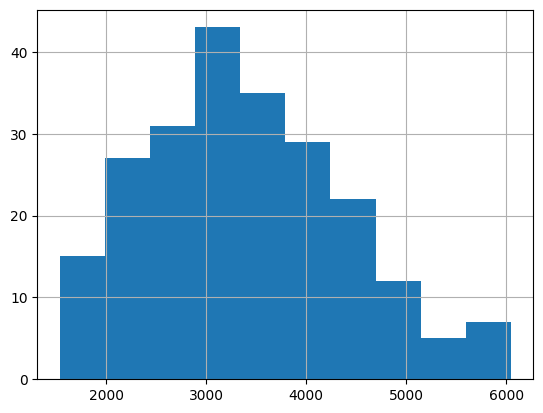

In [277]:
df['ApplicantIncome'].hist()

You may notice that the output is slightly skew.

<Axes: >

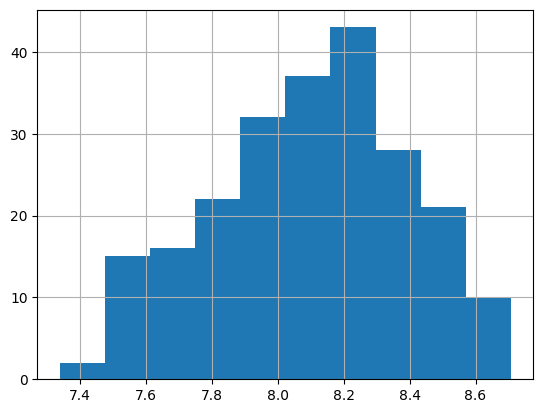

In [278]:
log_medv = np.log(df.ApplicantIncome)
log_medv.hist()

Apply transformation to the numeric columns to nomaize the numeric values before traing the data

In [279]:
df['CoapplicantIncome']=np.log(df['CoapplicantIncome'])
df['ApplicantIncome']=np.log(df['ApplicantIncome'])
df['LoanAmount']=np.log(df['LoanAmount'])
df['Loan_Amount_Term']=np.log(df['Loan_Amount_Term'])


c:\Users\Joshua\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


# **Preaper for ML**

In [280]:
from sklearn.metrics import ConfusionMatrixDisplay

In [281]:
df['Credit_History'].describe()

count     226.0
unique      3.0
top         1.0
freq      174.0
Name: Credit_History, dtype: float64

In [282]:
data = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_range','Loan_Status']]

In [283]:
from sklearn.preprocessing import LabelEncoder
# Columns to perform label encoding on
columns_to_encode = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','ApplicantIncome','CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Property_Area','Loan_range', 'Loan_Status']

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to each column in columns_to_encode
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

# Print the DataFrame after label encoding
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_range,Loan_Status
1,1,1,1,0,0,172,40,70,4,1.0,0,0,0
2,1,1,0,0,1,73,0,19,4,1.0,2,0,1
6,1,1,0,1,0,33,41,37,4,1.0,2,0,1
10,1,1,2,0,0,92,9,21,4,1.0,2,0,1
15,1,0,0,0,0,189,0,67,4,1.0,2,0,1


In [284]:
corr_matrix = data.corr()
corr_matrix['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.425444
Property_Area        0.157022
CoapplicantIncome    0.106188
Married              0.064278
Gender               0.056678
Loan_Amount_Term     0.021654
LoanAmount          -0.008406
Dependents          -0.051319
Education           -0.060301
Self_Employed       -0.091311
ApplicantIncome     -0.107577
Loan_range                NaN
Name: Loan_Status, dtype: float64

Train test _split

In [285]:
X =  data.drop(['Loan_Status'], axis=1)
y = data['Loan_Status']

In this section, data normalization will be performed to normalize the range of independent variables or features of data with `MinmaxScaler()`.

In [286]:
from sklearn.pipeline import Pipeline
#  also set a random state
rs = 42

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = rs)

In [288]:

# Define the models and their parameter grids
logreg_pipeline = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression())])
dt_pipeline = Pipeline([('scaler', StandardScaler()), ('dt', DecisionTreeClassifier())])
rf_pipeline = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier())])

logreg_param_grid = {
    'logreg__C': [0.1, 1.0, 10.0, 100],
    'logreg__solver': ['liblinear', 'lbfgs'],
    'logreg__max_iter': [100, 1000]
}

dt_param_grid = {
    'dt__max_depth': [None, 5, 10, 20],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4]
}

rf_param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 5, 10, 20],
}

pipelines = [
    ('LogisticRegression', logreg_pipeline, logreg_param_grid),
    ('DecisionTree', dt_pipeline, dt_param_grid),
    ('RandomForest', rf_pipeline, rf_param_grid)
]

# List to store results
results = []

# Perform Grid Search for each pipeline
for name, pipeline, param_grid in pipelines:
    print(f"Running GridSearchCV for {name}")
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Record results
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f"Best parameters of {name}: {best_params}")
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Best_Params': best_params
    })

# Convert results list to DataFrame
results_df = pd.DataFrame(results)
print("--- Completed ---")
print(results_df)





Running GridSearchCV for LogisticRegression
Best parameters of LogisticRegression: {'logreg__C': 0.1, 'logreg__max_iter': 100, 'logreg__solver': 'lbfgs'}
Running GridSearchCV for DecisionTree
Best parameters of DecisionTree: {'dt__max_depth': 5, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 10}
Running GridSearchCV for RandomForest
Best parameters of RandomForest: {'rf__max_depth': None, 'rf__n_estimators': 100}
--- Completed ---
                Model  Accuracy  \
0  LogisticRegression  0.739130   
1        DecisionTree  0.717391   
2        RandomForest  0.739130   

                                         Best_Params  
0  {'logreg__C': 0.1, 'logreg__max_iter': 100, 'l...  
1  {'dt__max_depth': 5, 'dt__min_samples_leaf': 1...  
2   {'rf__max_depth': None, 'rf__n_estimators': 100}  


In [289]:
# Select the model with the highest accuracy
best_model_row = results_df.loc[results_df['Accuracy'].idxmax()]
best_model_name = best_model_row['Model']
best_model_params = best_model_row['Best_Params']

In [290]:
# Define logistic regression pipeline with best parameters
if best_model_name == 'LogisticRegression':
    best_logreg_params = {
        'C': best_model_params['logreg__C'],
        'solver': best_model_params['logreg__solver'],
        'max_iter': best_model_params['logreg__max_iter']
    }
    best_model = LogisticRegression(**best_logreg_params)
    best_model_pipeline = Pipeline([('scaler', StandardScaler()), ('logreg', best_model)])
elif best_model_name == 'DecisionTree':
    best_dt_params = {
        'max_depth': best_model_params['dt__max_depth'],
        'min_samples_split': best_model_params['dt__min_samples_split'],
        'min_samples_leaf': best_model_params['dt__min_samples_leaf']
    }
    best_model = DecisionTreeClassifier(**best_dt_params)
    best_model_pipeline = Pipeline([('scaler', StandardScaler()), ('dt', best_model)])
elif best_model_name == 'RandomForest':
    best_rf_params = {
        'n_estimators': best_model_params['rf__n_estimators'],
        'max_depth': best_model_params['rf__max_depth']
    }
    best_model = RandomForestClassifier(**best_rf_params)
    best_model_pipeline = Pipeline([('scaler', StandardScaler()), ('rf', best_model)])

Best Model Accuracy: 0.739


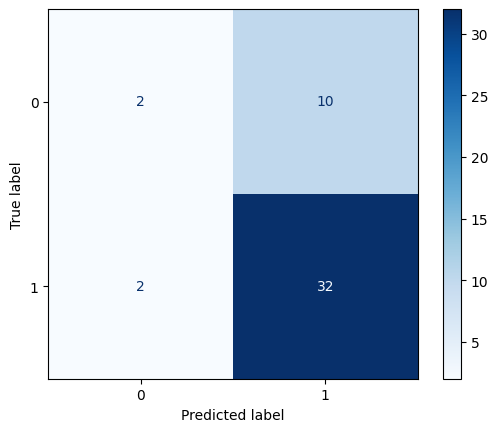

In [291]:
# Train the best model
best_model_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model_pipeline.predict(X_test)
y_proba = best_model_pipeline.predict_proba(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Model Accuracy: {accuracy:.3f}')

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


Let's print the best model selected

In [292]:
print("The best model row",best_model_row)


The best model row Model                                         LogisticRegression
Accuracy                                                 0.73913
Best_Params    {'logreg__C': 0.1, 'logreg__max_iter': 100, 'l...
Name: 0, dtype: object


# Random Forest Model

In [293]:

from imblearn.over_sampling import SMOTE
oversampler = SMOTE(random_state=0)
smote_train , smote_target = oversampler.fit_resample(X_train,y_train)

In [294]:
from sklearn.ensemble import RandomForestClassifier
x_train , x_test , y_train , y_test = train_test_split(X,y , test_size=0.3 , random_state=0)
rfc = RandomForestClassifier()
rfc = rfc.fit(smote_train,smote_target)
y_pred_rf = rfc.predict(x_test,)

print('accuracy',metrics.accuracy_score(y_test,y_pred_rf))

accuracy 0.9411764705882353


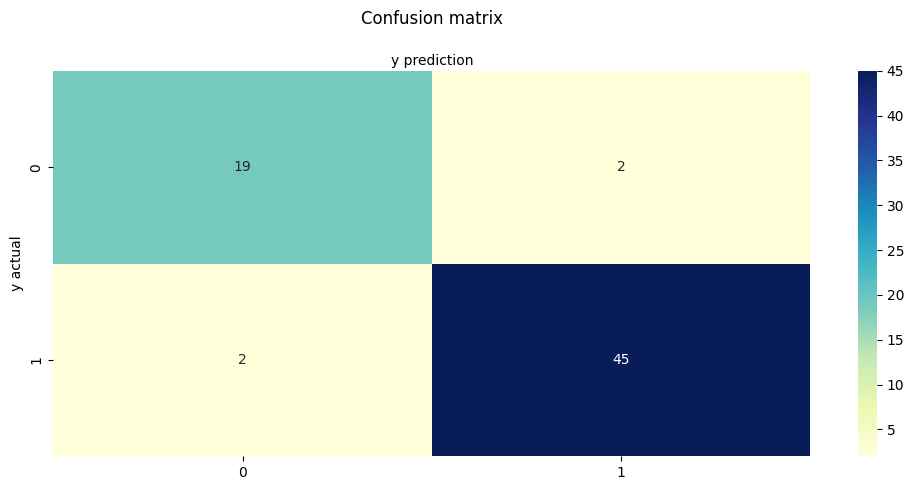

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.96      0.96      0.96        47

    accuracy                           0.94        68
   macro avg       0.93      0.93      0.93        68
weighted avg       0.94      0.94      0.94        68

Accuracy score 0.9411764705882353
f1 score score 0.9574468085106383


In [295]:

fig, ax = plt.subplots(figsize=(10,5))
cm = metrics.confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm,annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()

print(metrics.classification_report(y_test, y_pred_rf))
print("Accuracy score",metrics.accuracy_score(y_test, y_pred_rf))
print("f1 score score",metrics.f1_score(y_test, y_pred_rf))

### Build a Predictive system base on train data

In [296]:
# will rondomly select the array to test the our model buld 
input_data = data.iloc[23:24,0:-1]

#change the input data into numpy array
input_data_asnumpy_array = np.asanyarray(input_data)

#reshape the numpy array are we are insert new value for prediction
input_data_reshaped = input_data_asnumpy_array.reshape(1,-1)

prediction = rfc.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print("Elegible to get loan")
else:
    print("Not Elegible to get loan")

[0]
Elegible to get loan


#### The best model is Rondom Forest with acc 95.6% 